In [230]:
import pandas as pd 

data_main=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm.xlsx")

data=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm_drop.xlsx")


In [231]:
data_main

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",Force_C(Left).1
0,0,0.000000,0.000000,0.461877
1,1,0.000000,0.000000,0.461877
2,2,0.000000,0.000000,0.461877
3,3,0.000000,0.000000,0.461877
4,4,0.000000,0.000000,0.461877
...,...,...,...,...
596,596,0.064085,0.032817,0.266862
597,597,0.035381,0.020055,0.260330
598,598,0.010681,0.000000,0.260330
599,599,0.004005,0.000000,0.260330


In [232]:
data

,Unnamed: 0,FORCE_B(Right),"FORCE_C(Left),",Force_C(Left).1
0,0,0.000000,0.000000,0.461877
1,1,0.000000,0.000000,0.461877
2,2,0.000000,0.000000,0.461877
3,3,NaN,NaN,NaN
4,4,0.000000,0.000000,0.461877
...,...,...,...,...
596,596,0.064085,0.032817,0.266862
597,597,NaN,NaN,NaN
598,598,0.010681,0.000000,0.260330
599,599,0.004005,0.000000,0.260330


In [233]:
data_main.drop(columns=['Unnamed: 0'],inplace=True)
data.drop(columns=['Unnamed: 0'],inplace=True)

<Axes: >

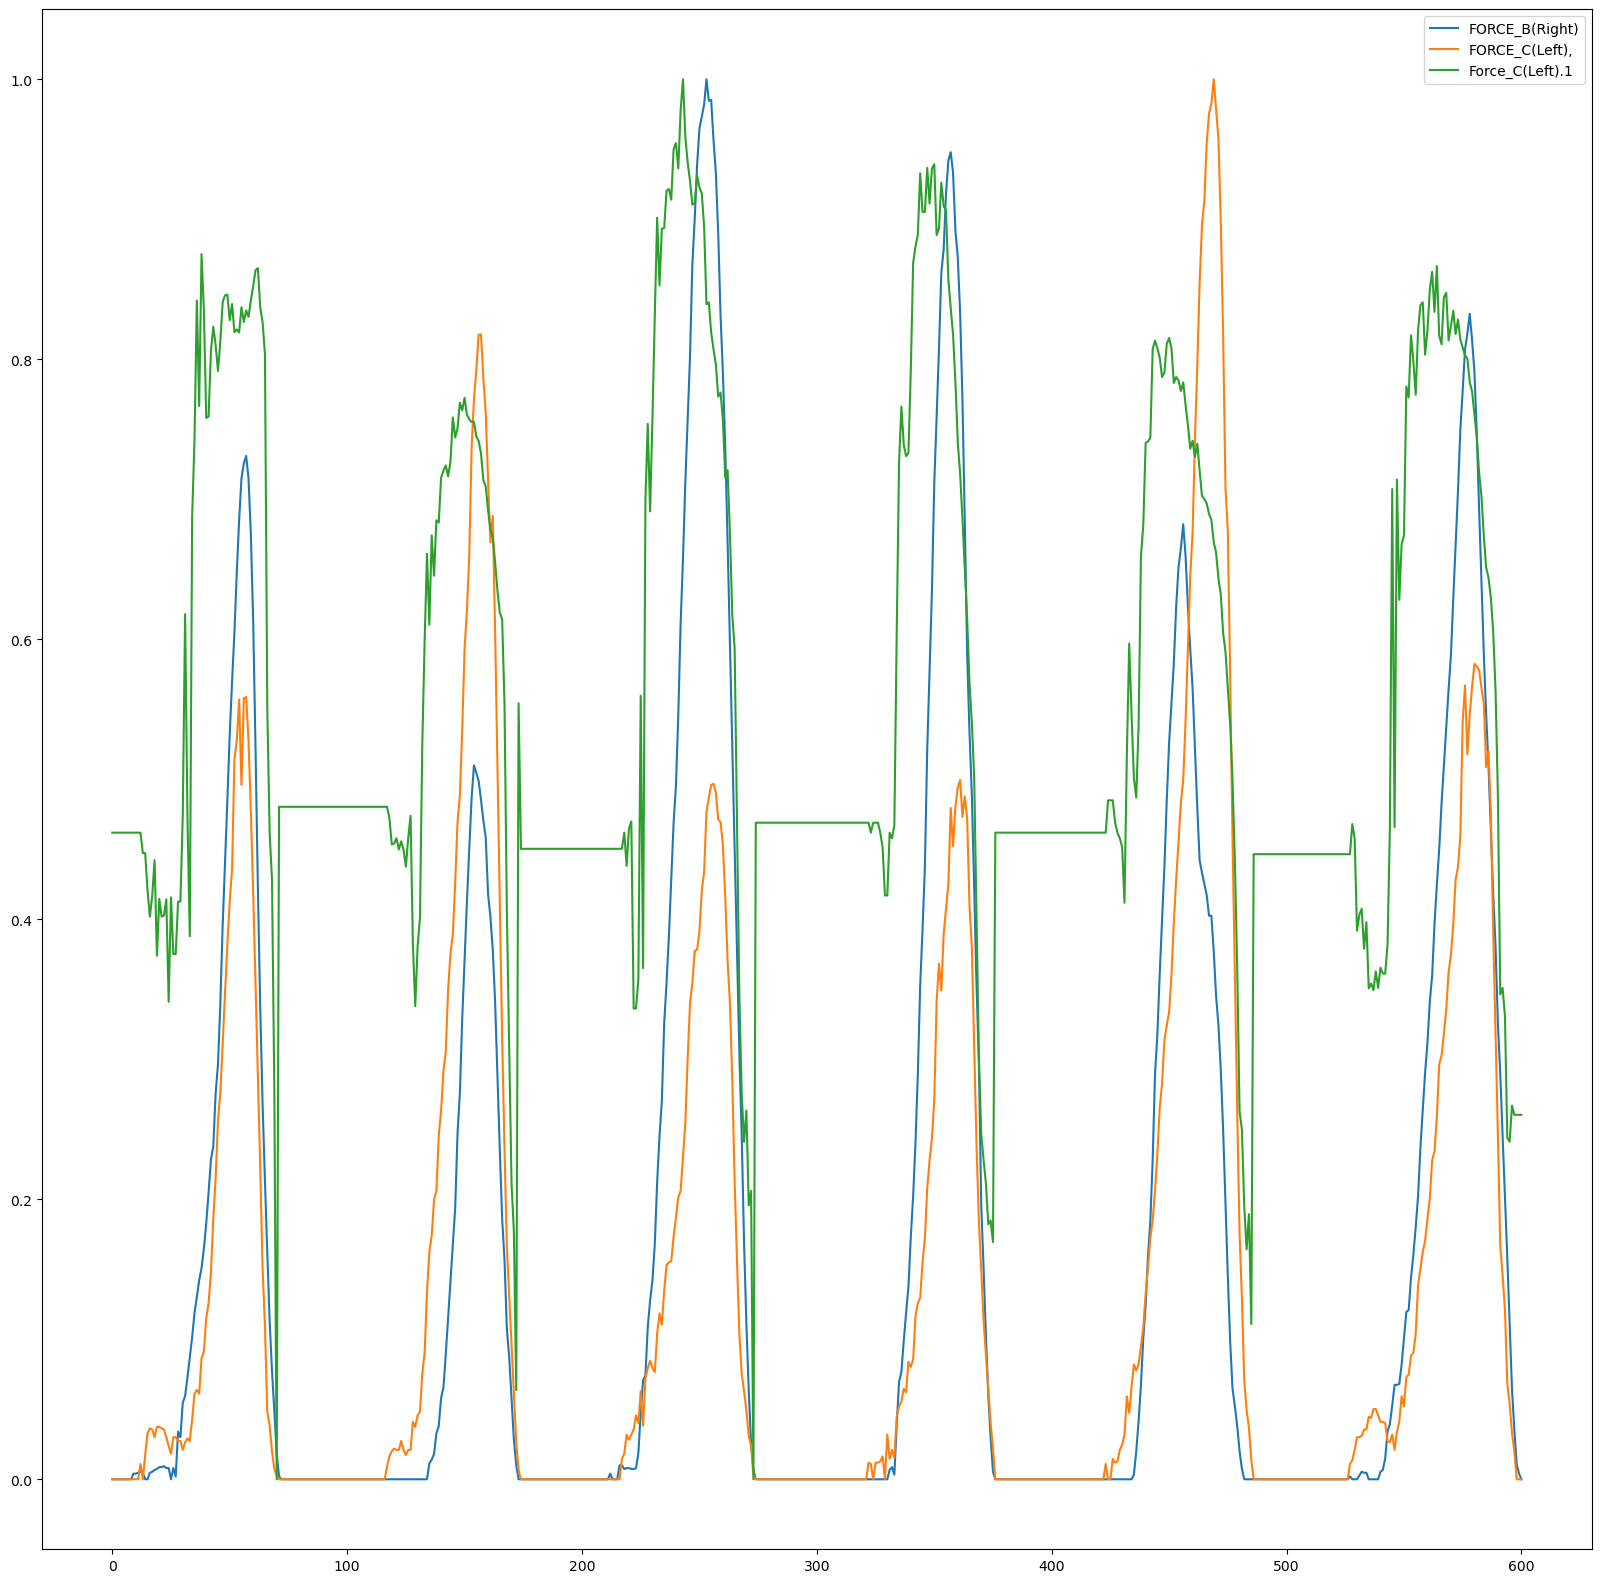

In [234]:
data_main.plot(figsize=(20,20))

<Axes: >

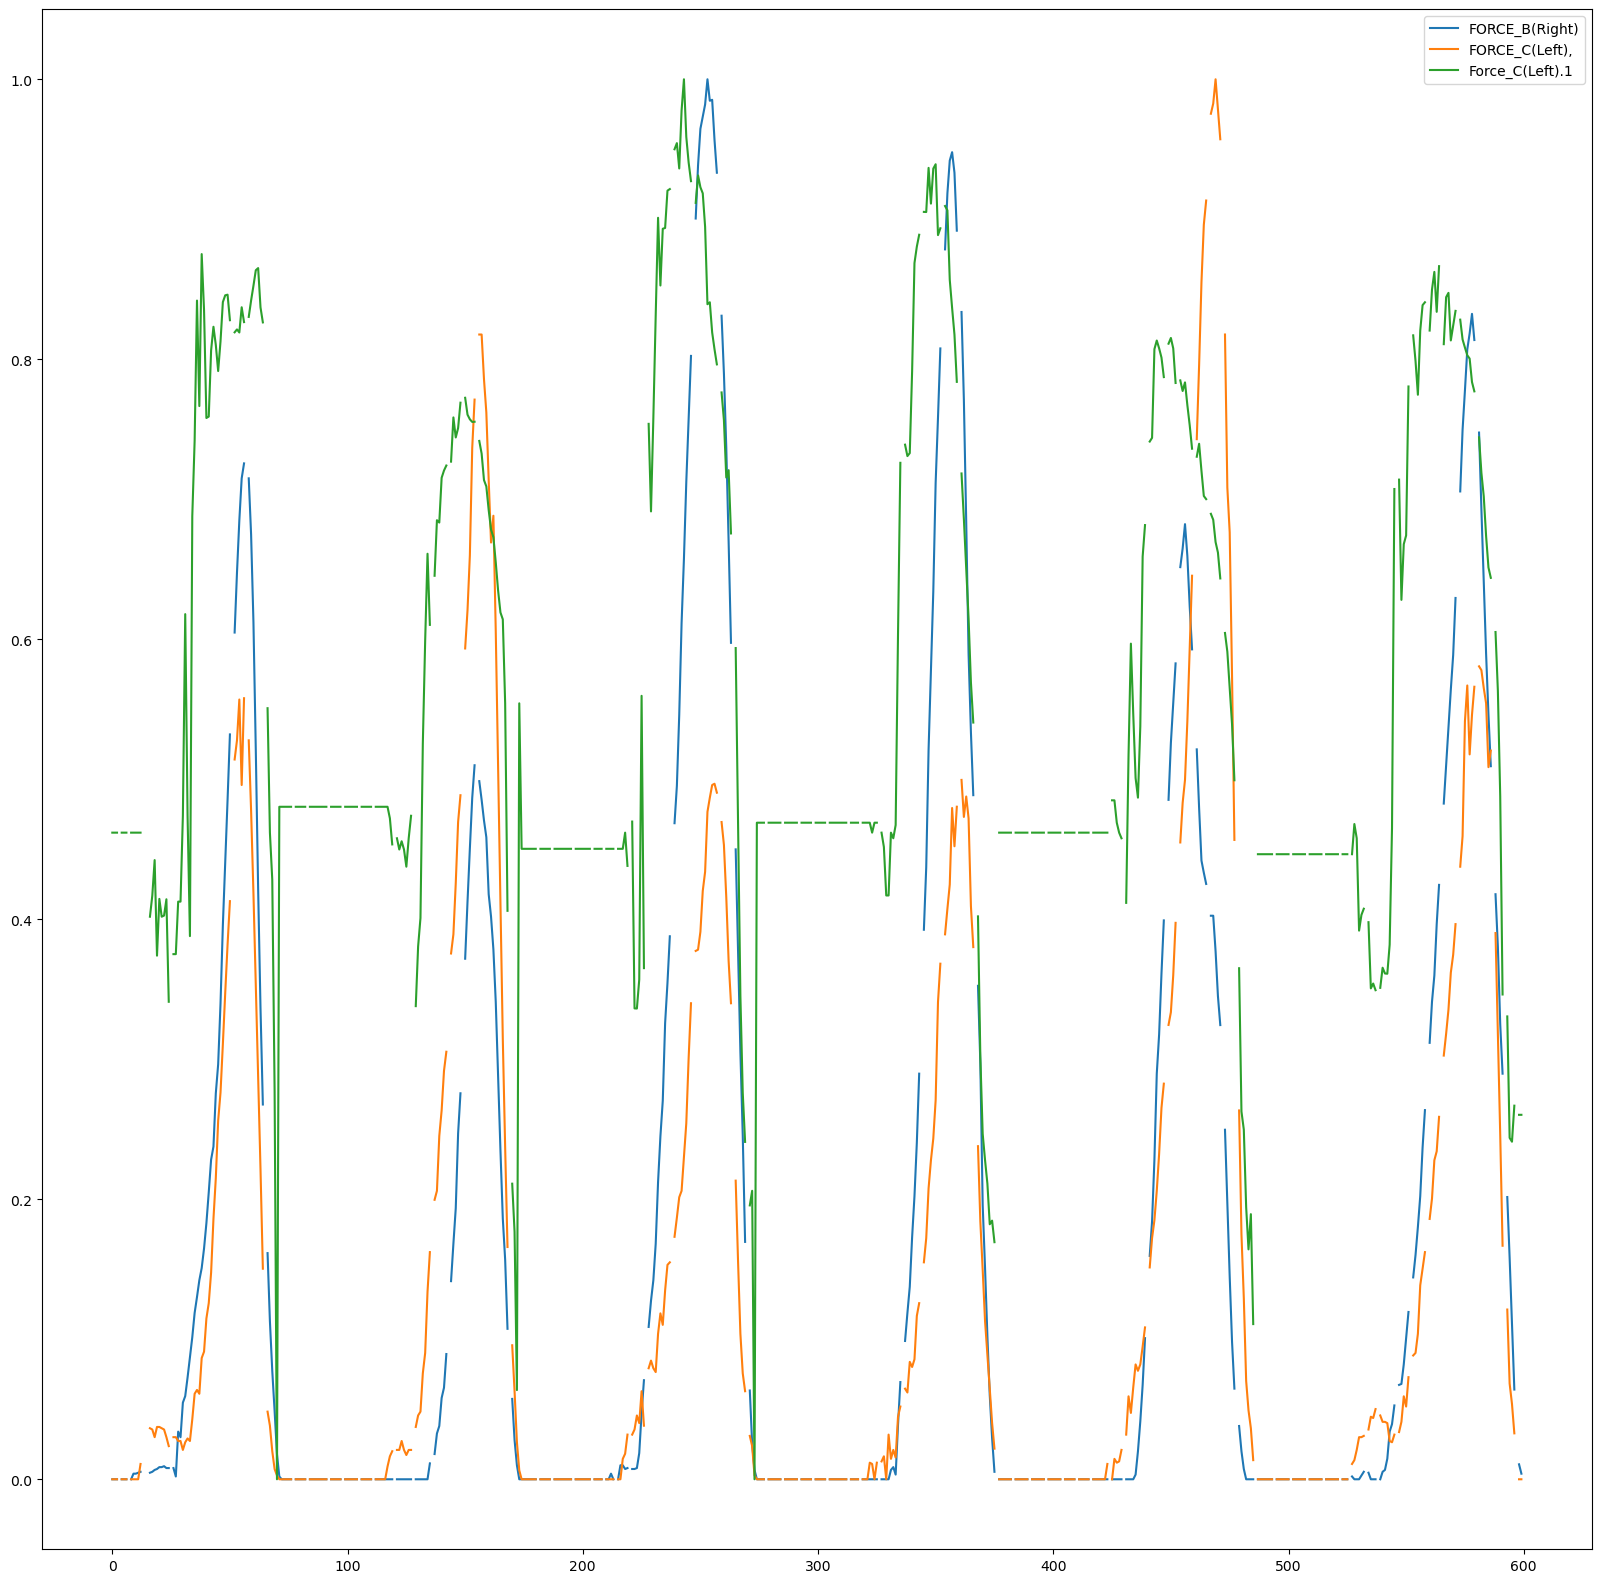

In [235]:
data.plot(figsize=(20,20))

In [236]:
print(data.isnull().sum())
print(data_main.isnull().sum())

FORCE_B(Right)     82
FORCE_C(Left),     82
Force_C(Left).1    82
dtype: int64
FORCE_B(Right)     0
FORCE_C(Left),     0
Force_C(Left).1    0
dtype: int64


FORCE_B(Right)


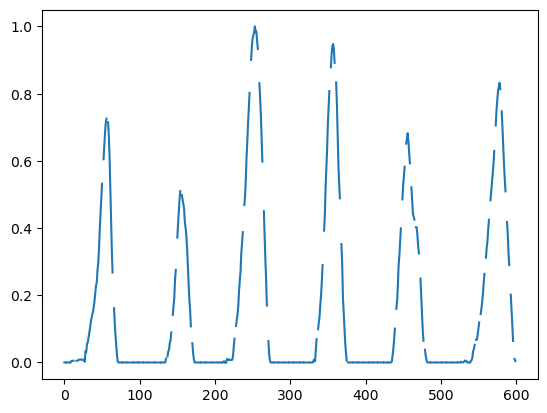

FORCE_C(Left),


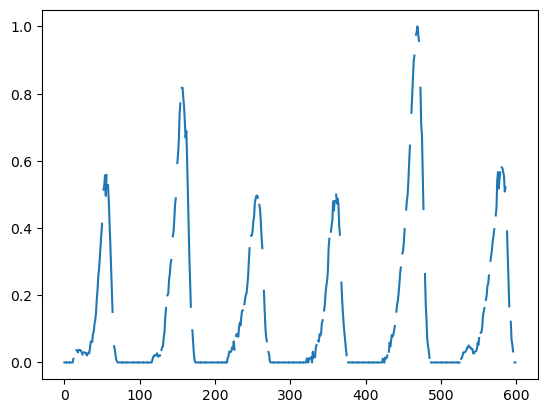

Force_C(Left).1


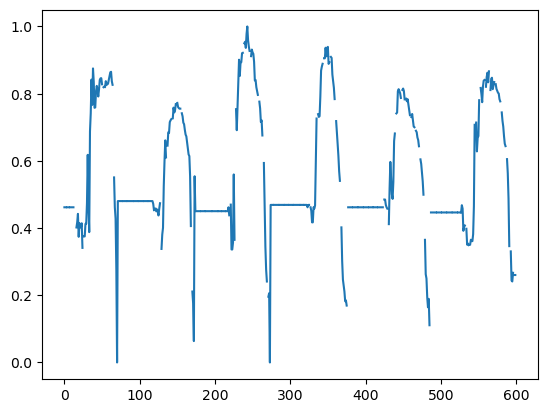

In [237]:
import matplotlib.pyplot as plt

columns=data.columns
count=0
for i in columns:
    print(columns[count])
    count=count+1
    plt.plot(data[i])
    plt.show()
    

In [238]:
## R_FORCE_B : FORCE_C(Left),
## R_FORCE_B : Force_C(Left).1

In [239]:
data_sca=pd.read_excel("/Users/withmocha/Desktop/TEED/data/mocha/23.11.14/gait/gait_target_norm.xlsx")
data_sca.drop(columns=["Unnamed: 0","FORCE_B(Right)"],inplace=True)




In [240]:
data_sca.columns

Index(['FORCE_C(Left),', 'Force_C(Left).1'], dtype='object')

In [241]:
from sklearn.preprocessing import MinMaxScaler



scaler=MinMaxScaler()
R_scaled=scaler.fit_transform(data_sca)
L_scaled=pd.DataFrame(data=R_scaled)

L_new=L_scaled.set_axis(["FORCE_C(Left),","Force_C(Left).1"],axis="columns")


L2=L_new.loc[:,['FORCE_C(Left),','Force_C(Left).1']]


L2=scaler.fit_transform(L2)

In [242]:
L_scaled

,0,1
0,0.000000,0.461877
1,0.000000,0.461877
2,0.000000,0.461877
3,0.000000,0.461877
4,0.000000,0.461877
...,...,...
596,0.032817,0.266862
597,0.020055,0.260330
598,0.000000,0.260330
599,0.000000,0.260330


In [243]:
R=data.loc[:,['FORCE_B(Right)']]
L=data.loc[:,['FORCE_C(Left),','Force_C(Left).1']]

<Axes: >

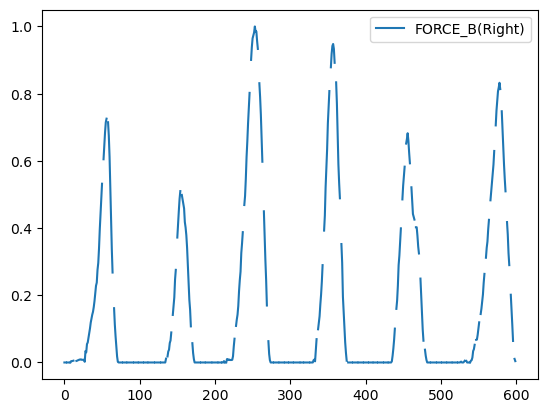

In [244]:
R.plot()

<Axes: >

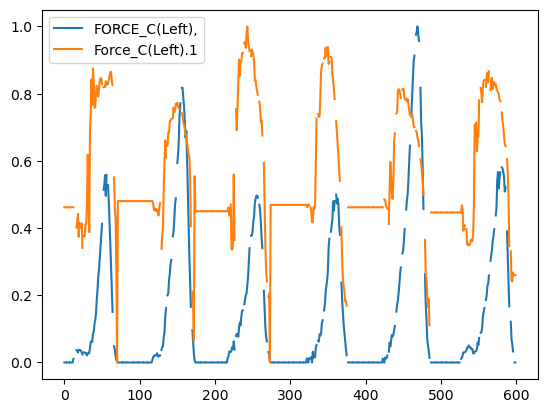

In [245]:
L.plot()

In [246]:
import numpy as np

index=R.index

loss_index_R_FORCE_B=np.array(R.index).reshape(-1,1)[R.iloc[:,0].isna()]


normal_index_R_FORCE_B=np.setdiff1d(index,loss_index_R_FORCE_B)


In [247]:
index=L.index

loss_index_L_FORCE_C=np.array(L.index).reshape(-1,1)[L.iloc[:,0].isna()]
loss_index_L_FORCE1_C=np.array(L.index).reshape(-1,1)[L.iloc[:,1].isna()]

normal_index_L_FORCE_C=np.setdiff1d(index,loss_index_L_FORCE_C)
normal_index_L_FORCE1_C=np.setdiff1d(index,loss_index_L_FORCE1_C)

In [248]:
## R_FORCE_B : L_FORCE_C
##  R_FORCE_B : L_FSR_C 

In [249]:
x_train_R_FORCE_B=normal_index_R_FORCE_B.reshape(-1,1)
y_train_L_FORCE_C=L.iloc[normal_index_L_FORCE_C,0]
x_test_L_FORCE_C=loss_index_L_FORCE_C

y_train_L_FORCE1_C=L.iloc[normal_index_L_FORCE1_C,1]
x_test_L_FORCE1_C=loss_index_L_FORCE1_C

L_FORCE_C=L.iloc[:,0].copy()
L_FORCE1_C=L.iloc[:,1].copy()

In [250]:
print(x_train_R_FORCE_B.shape)
print(y_train_L_FORCE_C.shape)

(519, 1)
(519,)


In [251]:
x_train_R_FORCE_B=x_train_R_FORCE_B.reshape(x_train_R_FORCE_B.shape[0],x_train_R_FORCE_B.shape[1],1)
x_test_L_FORCE_C=x_test_L_FORCE_C.reshape(x_test_L_FORCE_C.shape[0],x_test_L_FORCE_C.shape[1],1)
x_test_L_FORCE1_C=x_test_L_FORCE1_C.reshape(x_test_L_FORCE1_C.shape[0],x_test_L_FORCE1_C.shape[1],1)

In [252]:
print(x_test_L_FORCE1_C.shape)
print(x_test_L_FORCE_C.shape)

(82, 1, 1)
(82, 1, 1)


In [253]:
#[I 2023-11-21 09:10:14,391] Trial 9 finished with value: 0.06594959769568025 and parameters: {'batch_size': 97, 'steps_per_epoch': 10, 'epochs': 6054, 'filter': 125, 'lstm_par1': 166, 'lstm_par2': 191, 'dense_par': 144, 'dense_par1': 179}. Best is trial 0 with value: 0.014104034571709027.
#{'batch_size': 97, 'steps_per_epoch': 7, 'epochs': 6719, 'filter': 27, 'lstm_par1': 138, 'lstm_par2': 153, 'dense_par': 150, 'dense_par1': 124}

In [254]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from tensorflow.keras import layers
from keras.layers import Activation, Dense
import tensorflow as tf 
from tensorflow.keras import Model
from keras.layers import Dropout
from keras.layers import Dense, Input, TimeDistributed, Flatten
from keras.layers.convolutional import Conv1D ,MaxPooling1D
from keras.optimizers import adam
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import LSTM
from keras.layers import Bidirectional

model_cnnbilstm = Sequential()
model_cnnbilstm.add(TimeDistributed(Conv1D(filters=27, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnnbilstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Bidirectional(LSTM(138, return_sequences=True,activation='relu',dropout=0.001)))
model_cnnbilstm.add(Bidirectional(LSTM(153, return_sequences=True,activation='relu',dropout=0.001)))
model_cnnbilstm.add(TimeDistributed(Dense(150, activation='relu')))
model_cnnbilstm.add(TimeDistributed(Dense(124, activation='relu')))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Dense(1))
model_cnnbilstm.compile(loss='mse', optimizer='adam')
model_cnnbilstm.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_84 (TimeDi  (None, None, 1, 27)      54        
 stributed)                                                      
                                                                 
 time_distributed_85 (TimeDi  (None, None, 1, 27)      0         
 stributed)                                                      
                                                                 
 time_distributed_86 (TimeDi  (None, None, 27)         0         
 stributed)                                                      
                                                                 
 bidirectional_28 (Bidirecti  (None, None, 276)        183264    
 onal)                                                           
                                                                 
 bidirectional_29 (Bidirecti  (None, None, 306)      

In [255]:
model_cnnbilstm.fit(x_train_R_FORCE_B,y_train_L_FORCE_C,epochs=6719,verbose=2,batch_size=97,steps_per_epoch=4)
pred=model_cnnbilstm.predict(x_test_L_FORCE_C)
pred=pred.reshape(-1,1)

Epoch 1/6719
4/4 - 4s - loss: 1.7598 - 4s/epoch - 942ms/step
Epoch 2/6719
4/4 - 0s - loss: 0.1376 - 20ms/epoch - 5ms/step
Epoch 3/6719
4/4 - 0s - loss: 0.1102 - 20ms/epoch - 5ms/step
Epoch 4/6719
4/4 - 0s - loss: 0.0809 - 22ms/epoch - 6ms/step
Epoch 5/6719
4/4 - 0s - loss: 0.0938 - 22ms/epoch - 5ms/step
Epoch 6/6719
4/4 - 0s - loss: 0.0625 - 24ms/epoch - 6ms/step
Epoch 7/6719
4/4 - 0s - loss: 0.0881 - 20ms/epoch - 5ms/step
Epoch 8/6719
4/4 - 0s - loss: 0.0955 - 20ms/epoch - 5ms/step
Epoch 9/6719
4/4 - 0s - loss: 0.0548 - 20ms/epoch - 5ms/step
Epoch 10/6719
4/4 - 0s - loss: 0.0546 - 20ms/epoch - 5ms/step
Epoch 11/6719
4/4 - 0s - loss: 0.0537 - 20ms/epoch - 5ms/step
Epoch 12/6719
4/4 - 0s - loss: 0.0545 - 20ms/epoch - 5ms/step
Epoch 13/6719
4/4 - 0s - loss: 0.0498 - 21ms/epoch - 5ms/step
Epoch 14/6719
4/4 - 0s - loss: 0.0467 - 19ms/epoch - 5ms/step
Epoch 15/6719
4/4 - 0s - loss: 0.0485 - 20ms/epoch - 5ms/step
Epoch 16/6719
4/4 - 0s - loss: 0.0531 - 21ms/epoch - 5ms/step
Epoch 17/6719
4/4

In [256]:
c=0
for i in loss_index_L_FORCE_C:    
    L_FORCE_C[i]=pred[c]
    c+=1

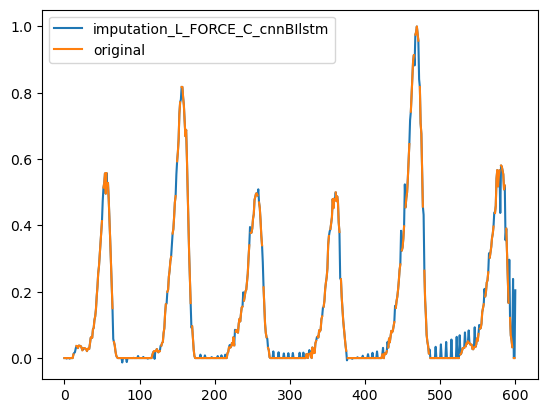

In [257]:
import matplotlib.pyplot as plt 
plt.plot(L_FORCE_C,label='imputation_L_FORCE_C_cnnBIlstm')
plt.plot(L.iloc[:,0],label='original')
plt.legend()

In [258]:
#[I 2023-11-21 10:09:20,880] Trial 9 finished with value: 0.01602388130024641 and parameters: {'batch_size': 88, 'steps_per_epoch': 3, 'epochs': 8883, 'filter': 69, 'lstm_par1': 179, 'lstm_par2': 131, 'dense_par': 153, 'dense_par1': 189}. Best is trial 9 with value: 0.01602388130024641.
#{'batch_size': 88, 'steps_per_epoch': 3, 'epochs': 8883, 'filter': 69, 'lstm_par1': 179, 'lstm_par2': 131, 'dense_par': 153, 'dense_par1': 189}

In [259]:
model_cnnbilstm = Sequential()
model_cnnbilstm.add(TimeDistributed(Conv1D(filters=69, kernel_size=1, activation='relu'), input_shape=(None, x_train_R_FORCE_B.shape[1], x_train_R_FORCE_B.shape[2])))
model_cnnbilstm.add(TimeDistributed(MaxPooling1D(pool_size=1)))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Bidirectional(LSTM(179, return_sequences=True,activation='relu',dropout=0.001)))
model_cnnbilstm.add(Bidirectional(LSTM(131, return_sequences=True,activation='relu',dropout=0.001,)))
model_cnnbilstm.add(TimeDistributed(Dense(153, activation='relu')))
model_cnnbilstm.add(TimeDistributed(Dense(189, activation='relu')))
model_cnnbilstm.add(TimeDistributed(Flatten()))
model_cnnbilstm.add(Dense(1))
model_cnnbilstm.compile(loss='mse', optimizer='adam')
model_cnnbilstm.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_90 (TimeDi  (None, None, 1, 69)      138       
 stributed)                                                      
                                                                 
 time_distributed_91 (TimeDi  (None, None, 1, 69)      0         
 stributed)                                                      
                                                                 
 time_distributed_92 (TimeDi  (None, None, 69)         0         
 stributed)                                                      
                                                                 
 bidirectional_30 (Bidirecti  (None, None, 358)        356568    
 onal)                                                           
                                                                 
 bidirectional_31 (Bidirecti  (None, None, 262)      

In [260]:
model_cnnbilstm.fit(x_train_R_FORCE_B,y_train_L_FORCE1_C,epochs=8883,verbose=2,batch_size=88,steps_per_epoch=3)

Epoch 1/8883
3/3 - 2s - loss: 2.5888 - 2s/epoch - 586ms/step
Epoch 2/8883
3/3 - 0s - loss: 0.2584 - 21ms/epoch - 7ms/step
Epoch 3/8883
3/3 - 0s - loss: 0.0995 - 15ms/epoch - 5ms/step
Epoch 4/8883
3/3 - 0s - loss: 0.0624 - 15ms/epoch - 5ms/step
Epoch 5/8883
3/3 - 0s - loss: 0.0491 - 18ms/epoch - 6ms/step
Epoch 6/8883
3/3 - 0s - loss: 0.0623 - 16ms/epoch - 5ms/step
Epoch 7/8883
3/3 - 0s - loss: 0.0523 - 15ms/epoch - 5ms/step
Epoch 8/8883
3/3 - 0s - loss: 0.0566 - 15ms/epoch - 5ms/step
Epoch 9/8883
3/3 - 0s - loss: 0.0534 - 16ms/epoch - 5ms/step
Epoch 10/8883
3/3 - 0s - loss: 0.0397 - 16ms/epoch - 5ms/step
Epoch 11/8883
3/3 - 0s - loss: 0.0390 - 16ms/epoch - 5ms/step
Epoch 12/8883
3/3 - 0s - loss: 0.0397 - 15ms/epoch - 5ms/step
Epoch 13/8883
3/3 - 0s - loss: 0.0390 - 15ms/epoch - 5ms/step
Epoch 14/8883
3/3 - 0s - loss: 0.0375 - 14ms/epoch - 5ms/step
Epoch 15/8883
3/3 - 0s - loss: 0.0408 - 15ms/epoch - 5ms/step
Epoch 16/8883
3/3 - 0s - loss: 0.0398 - 15ms/epoch - 5ms/step
Epoch 17/8883
3/3

In [261]:
pred=model_cnnbilstm.predict(x_test_L_FORCE1_C)
pred=pred.reshape(-1,1)

3/3 [==============================] - 1s 2ms/step


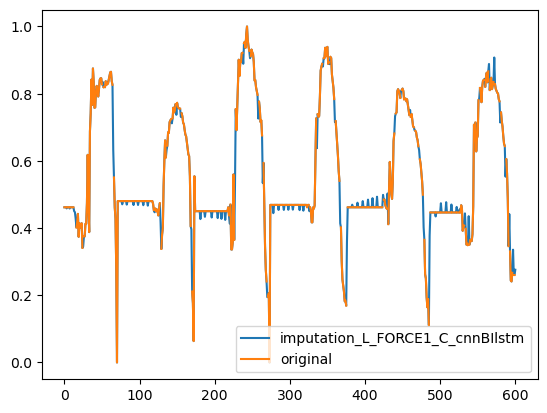

In [262]:
c=0
for i in loss_index_L_FORCE1_C:    
    L_FORCE1_C[i]=pred[c]
    c+=1
    
    #
plt.plot(L_FORCE1_C,label='imputation_L_FORCE1_C_cnnBIlstm')
plt.plot(L.iloc[:,1],label='original')
plt.legend()

In [263]:
import numpy as np

def RMSE(data,pred):
    n=len(data)
    return np.sqrt((np.sum((data-pred)**2))/n)

print(RMSE(data_main['FORCE_C(Left),'],L_FORCE_C))
print(RMSE(data_main['Force_C(Left).1'],L_FORCE1_C))

0.019646832618047783
0.01947410954595796


In [264]:
L.isnull().sum()

FORCE_C(Left),     82
Force_C(Left).1    82
dtype: int64

In [265]:
for i in loss_index_L_FORCE_C:    
    L['FORCE_C(Left),'][i]=L_FORCE_C[i]
    
for i in loss_index_L_FORCE1_C:    
    L['Force_C(Left).1'][i]=L_FORCE1_C[i]

In [266]:
L.isnull().sum()

FORCE_C(Left),     0
Force_C(Left).1    0
dtype: int64

<Axes: >

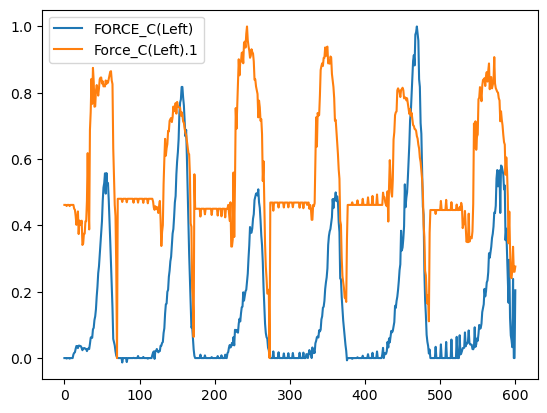

In [267]:
L=L.set_axis(["FORCE_C(Left)","Force_C(Left).1"],axis="columns")
L.plot()

<Axes: >

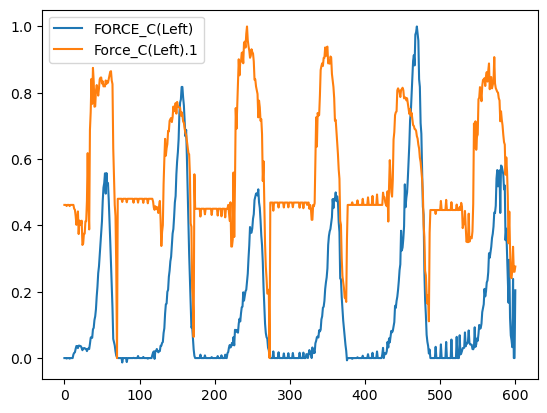

In [268]:
L = pd.DataFrame(scaler.inverse_transform(L))
L_sca=L.set_axis(["FORCE_C(Left)","Force_C(Left).1"],axis="columns")
L_sca.plot()